## ```Feature Engineering Cont.```



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import pickle

In [3]:
# Your dataset is a CSV file named 'phishing_dataset.csv'
df = pd.read_csv('D:/Hegtavic/Phishing FYP/Phishing_Legitimate_full.csv')


In [4]:
columns_to_keep = ['CLASS_LABEL', 'PctExtNullSelfRedirectHyperlinksRT', 'FrequentDomainNameMismatch', 'NumDash', 
                    'SubmitInfoToEmail', 'PctNullSelfRedirectHyperlinks', 'InsecureForms', 'NumDots', 
                    'PctExtHyperlinks', 'NumSensitiveWords']


dft = pd.read_csv('D:/Hegtavic/Phishing FYP/Phishing_Legitimate_test.csv')

# Keep only the specified columns
df2 = df[columns_to_keep]
dft2 = df[columns_to_keep]


# Display the first few rows of the filtered DataFrame
print(df2.head())

   CLASS_LABEL  PctExtNullSelfRedirectHyperlinksRT  \
0            1                                   1   
1            1                                   1   
2            1                                   0   
3            1                                  -1   
4            1                                  -1   

   FrequentDomainNameMismatch  NumDash  SubmitInfoToEmail  \
0                           0        0                  0   
1                           0        0                  0   
2                           0        0                  0   
3                           1        1                  1   
4                           1        0                  0   

   PctNullSelfRedirectHyperlinks  InsecureForms  NumDots  PctExtHyperlinks  \
0                            0.0              1        3             0.000   
1                            0.0              1        3             0.000   
2                            0.0              1        3             0.375

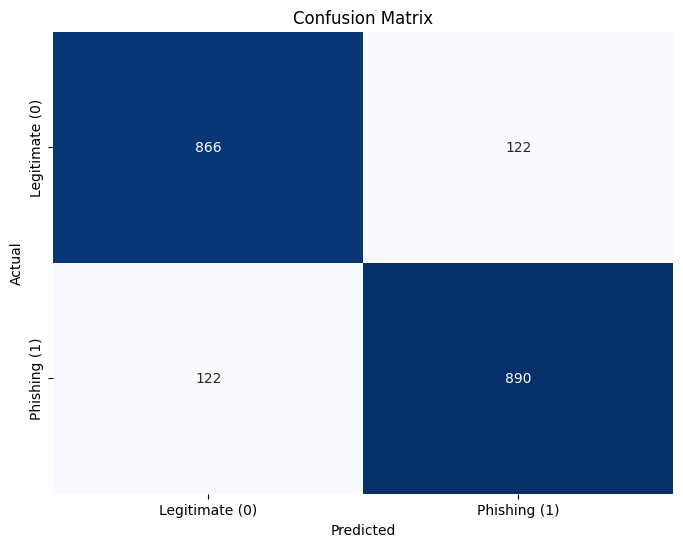

Accuracy: 0.8780
Precision: 0.8794
Recall: 0.8794
F1 Score: 0.8794


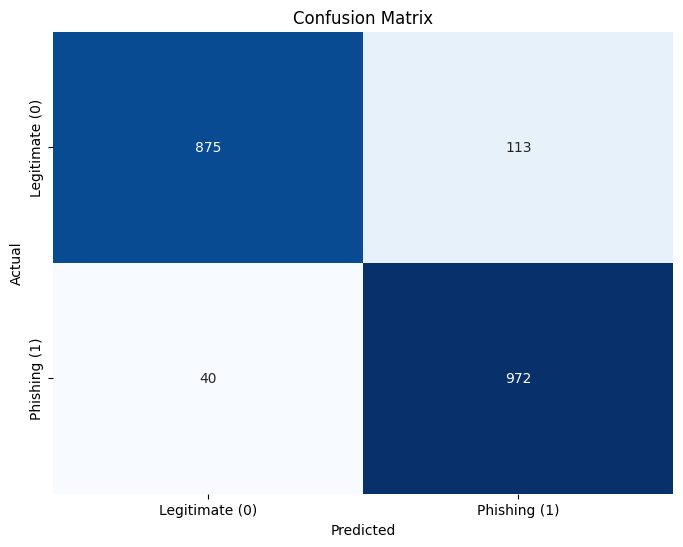

Accuracy: 0.9235
Precision: 0.8959
Recall: 0.9605
F1 Score: 0.9270


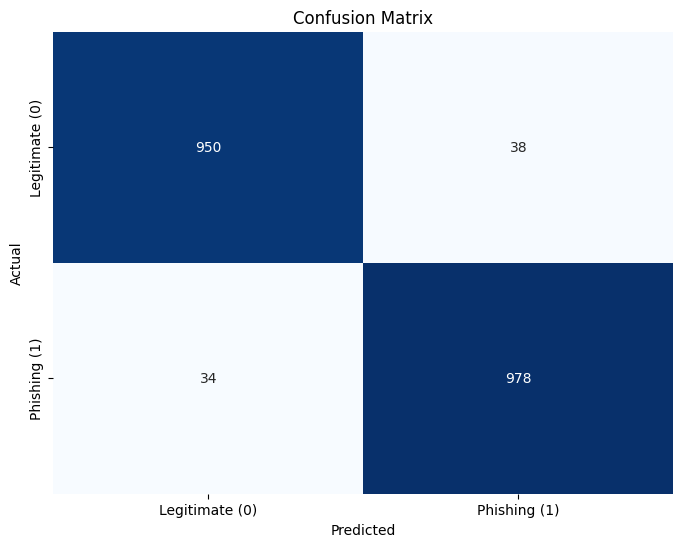

Accuracy: 0.9640
Precision: 0.9626
Recall: 0.9664
F1 Score: 0.9645


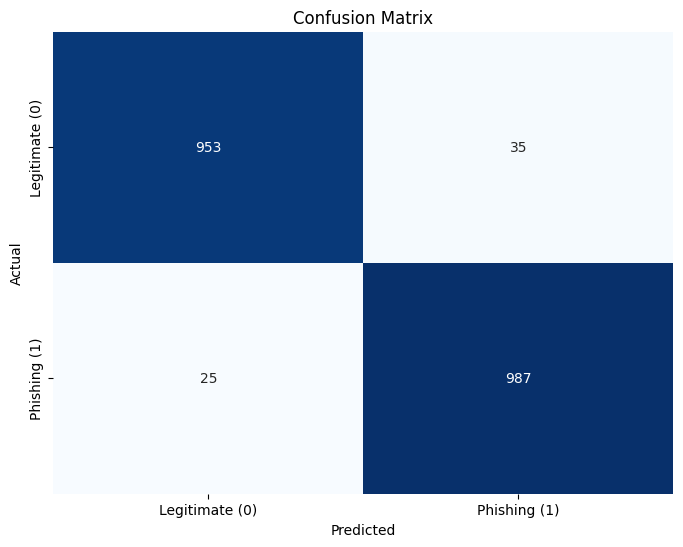

Accuracy: 0.9700
Precision: 0.9658
Recall: 0.9753
F1 Score: 0.9705


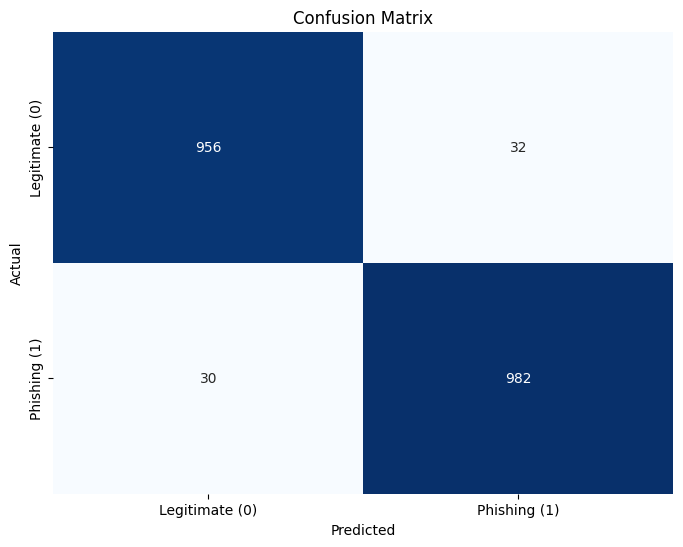

Accuracy: 0.9690
Precision: 0.9684
Recall: 0.9704
F1 Score: 0.9694


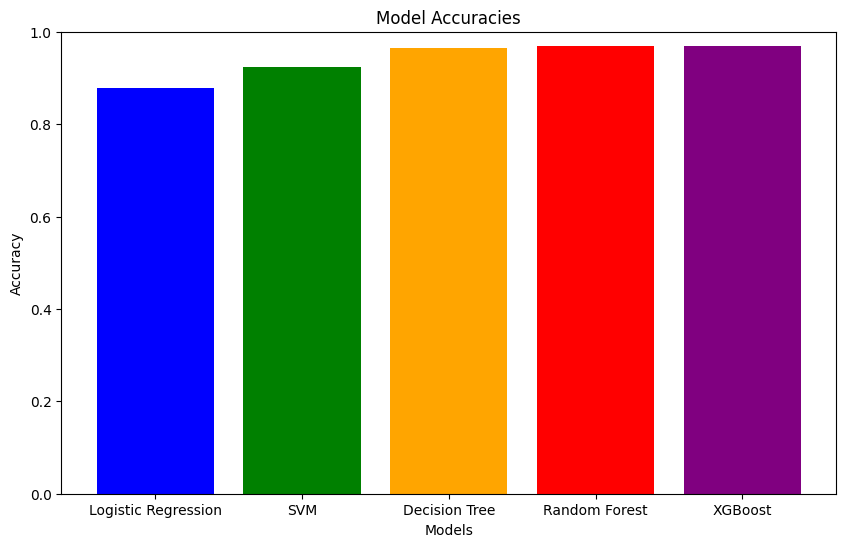

The best model (Random Forest) has been saved as 'best_model.pkl'


c:\Users\marmu\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.7777, Precision: 0.9553952115447688, Recall: 0.5826, F1 Score: 0.7238166231830041


In [5]:
# Drop any rows with missing values for simplicity (handle missing values as needed in practice)
df2 = df2.dropna()

# Features
X = df2.drop('CLASS_LABEL', axis=1)

# Target variable
y = df2['CLASS_LABEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy1 = accuracy_score(y_test, logistic_predictions)
precision = precision_score(y_test, logistic_predictions)
recall = recall_score(y_test, logistic_predictions)
f1 = f1_score(y_test, logistic_predictions)
conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate (0)', 'Phishing (1)'],
            yticklabels=['Legitimate (0)', 'Phishing (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display performance metrics
print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy2 = accuracy_score(y_test, svm_predictions)
precision = precision_score(y_test, svm_predictions)
recall = recall_score(y_test, svm_predictions)
f1 = f1_score(y_test, svm_predictions)
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate (0)', 'Phishing (1)'],
            yticklabels=['Legitimate (0)', 'Phishing (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display performance metrics
print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy3 = accuracy_score(y_test, dt_predictions)
precision = precision_score(y_test, dt_predictions)
recall = recall_score(y_test, dt_predictions)
f1 = f1_score(y_test, dt_predictions)
conf_matrix = confusion_matrix(y_test, dt_predictions)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate (0)', 'Phishing (1)'],
            yticklabels=['Legitimate (0)', 'Phishing (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display performance metrics
print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy4 = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate (0)', 'Phishing (1)'],
            yticklabels=['Legitimate (0)', 'Phishing (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display performance metrics
print(f"Accuracy: {accuracy4:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy5 = accuracy_score(y_test, xgb_predictions)
precision = precision_score(y_test, xgb_predictions)
recall = recall_score(y_test, xgb_predictions)
f1 = f1_score(y_test, xgb_predictions)
conf_matrix = confusion_matrix(y_test, xgb_predictions)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate (0)', 'Phishing (1)'],
            yticklabels=['Legitimate (0)', 'Phishing (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display performance metrics
print(f"Accuracy: {accuracy5:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# You have the accuracy values from each model
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy values
plt.show()

## **Stage # 3:** ```Pickel Format Saving```


# You have the accuracy values and models
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]
models = [logistic_model, svm_model, dt_model, rf_model, xgb_model]

# Find the index of the model with the highest accuracy
best_model_index = accuracies.index(max(accuracies))

# Get the best model and its name
best_model = models[best_model_index]
best_model_name = model_names[best_model_index]

# Save the best model using pickle
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print(f"The best model ({best_model_name}) has been saved as 'best_model.pkl'")

import pandas as pd
import joblib

# Load the model
rfc_model = joblib.load("D:/Hegtavic/Phishing FYP/best_model.pkl")

# Features
X_test = dft2.drop('CLASS_LABEL', axis=1)

# Make predictions
predictions = rfc_model.predict(X_test)

true_labels = dft2['CLASS_LABEL']

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

# Print or use the evaluation metrics as needed
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")